## Import packages and clean the data

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('driving_log.csv',names=['Center_Image','Left_Image','Right_Image','Steering_Angle','Throttle','Break','Speed'])

In [3]:
data

,Center_Image,Left_Image,Right_Image,Steering_Angle,Throttle,Break,Speed
0,/Users/joshhoko/Documents/projects/udacity/beh...,/Users/joshhoko/Documents/projects/udacity/be...,/Users/joshhoko/Documents/projects/udacity/be...,0.0,0.0,0.0,0.000079
1,/Users/joshhoko/Documents/projects/udacity/beh...,/Users/joshhoko/Documents/projects/udacity/be...,/Users/joshhoko/Documents/projects/udacity/be...,0.0,0.0,0.0,0.000080
2,/Users/joshhoko/Documents/projects/udacity/beh...,/Users/joshhoko/Documents/projects/udacity/be...,/Users/joshhoko/Documents/projects/udacity/be...,0.0,0.0,0.0,0.000079
3,/Users/joshhoko/Documents/projects/udacity/beh...,/Users/joshhoko/Documents/projects/udacity/be...,/Users/joshhoko/Documents/projects/udacity/be...,0.0,0.0,0.0,0.000078
4,/Users/joshhoko/Documents/projects/udacity/beh...,/Users/joshhoko/Documents/projects/udacity/be...,/Users/joshhoko/Documents/projects/udacity/be...,0.0,0.0,0.0,0.000078
...,...,...,...,...,...,...,...
3735,/Users/joshhoko/Documents/projects/udacity/beh...,/Users/joshhoko/Documents/projects/udacity/be...,/Users/joshhoko/Documents/projects/udacity/be...,0.0,0.0,0.0,8.464977
3736,/Users/joshhoko/Documents/projects/udacity/beh...,/Users/joshhoko/Documents/projects/udacity/be...,/Users/joshhoko/Documents/projects/udacity/be...,0.0,0.0,0.0,8.380009
3737,/Users/joshhoko/Documents/projects/udacity/beh...,/Users/joshhoko/Documents/projects/udacity/be...,/Users/joshhoko/Documents/projects/udacity/be...,0.0,0.0,0.0,8.279323
3738,/Users/joshhoko/Documents/projects/udacity/beh...,/Users/joshhoko/Documents/projects/udacity/be...,/Users/joshhoko/Documents/projects/udacity/be...,0.0,0.0,0.0,8.196225


In [4]:
images=[]

lines1=data['Center_Image'].str.split('/')
lines2=data['Left_Image'].str.split('/')
lines3=data['Right_Image'].str.split('/')

for line in lines1:
    current_path='IMG/'+line[-1]
    image=cv2.imread(current_path)
    images.append(image)
    
for line in lines2:
    current_path='IMG/'+line[-1]
    image=cv2.imread(current_path)
    images.append(image)
    
for line in lines3:
    current_path='IMG/'+line[-1]
    image=cv2.imread(current_path)
    images.append(image)
X_train=np.array(images)
X_train

array([[[[185, 145, 116],
         [185, 145, 116],
         [184, 144, 115],
         ...,
         [ 15,  27,  27],
         [  0,   3,   3],
         [  9,  19,  19]],

        [[185, 145, 116],
         [185, 145, 116],
         [185, 145, 116],
         ...,
         [  2,  14,  14],
         [  6,  16,  16],
         [  6,  16,  16]],

        [[186, 146, 117],
         [186, 146, 117],
         [186, 146, 117],
         ...,
         [ 29,  42,  40],
         [  0,  11,  11],
         [  0,   8,   8]],

        ...,

        [[ 86,  92,  87],
         [ 77,  83,  78],
         [ 71,  77,  72],
         ...,
         [105, 121, 120],
         [ 97, 113, 112],
         [ 82,  98,  97]],

        [[ 67,  73,  68],
         [ 62,  68,  63],
         [ 62,  68,  63],
         ...,
         [ 87, 103, 102],
         [ 78,  94,  93],
         [ 69,  85,  84]],

        [[ 49,  55,  50],
         [ 51,  57,  52],
         [ 62,  68,  63],
         ...,
         [ 97, 113, 112],
        

In [5]:
y_train=data['Steering_Angle']
y_train=y_train.append(data['Steering_Angle'])
y_train=np.array(y_train.append(data['Steering_Angle']))


/var/folders/jd/k51hs7057xg1r13c9hjlzqlh0000gn/T/ipykernel_22738/4241263108.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train=y_train.append(data['Steering_Angle'])
/var/folders/jd/k51hs7057xg1r13c9hjlzqlh0000gn/T/ipykernel_22738/4241263108.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train=np.array(y_train.append(data['Steering_Angle']))


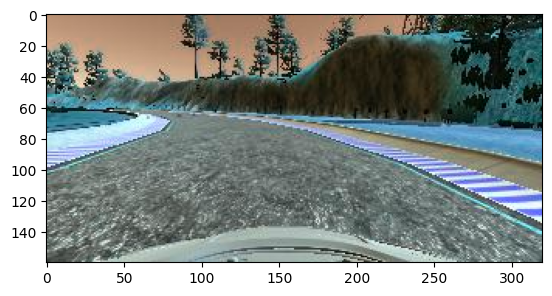

In [6]:
plt.imshow(images[0])

## make the model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Lambda,Convolution2D,MaxPooling2D,Cropping2D

In [8]:
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((50,20), (0,0))))
model.add(Conv2D(24, (5, 5), strides=(2, 2), activation="relu"))
model.add(Conv2D(36, (5, 5), strides=(2, 2), activation="relu"))
model.add(Conv2D(48, (5, 5), strides=(2, 2), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')
history=model.fit(X_train,y_train,validation_split=0.2,shuffle=True,epochs=10)

model.save('model.h5')

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Mean Squared Error Loss')
plt.ylabel('Mean Squared Error Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper right')
plt.show()

Epoch 1/10


2023-09-11 00:26:29.778784: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


281/281 [==============================] - 3s 11ms/step - loss: 0.0343 - val_loss: 0.0425
Epoch 2/10
281/281 [==============================] - 3s 11ms/step - loss: 0.0309 - val_loss: 0.0421
Epoch 3/10
281/281 [==============================] - 3s 12ms/step - loss: 0.0288 - val_loss: 0.0406
Epoch 4/10
281/281 [==============================] - 3s 12ms/step - loss: 0.0273 - val_loss: 0.0413
Epoch 5/10
281/281 [==============================] - 4s 13ms/step - loss: 0.0264 - val_loss: 0.0453
Epoch 6/10
281/281 [==============================] - 4s 13ms/step - loss: 0.0256 - val_loss: 0.0406
Epoch 7/10
281/281 [==============================] - 3s 12ms/step - loss: 0.0251 - val_loss: 0.0430
Epoch 8/10
281/281 [==============================] - 3s 12ms/step - loss: 0.0246 - val_loss: 0.0436
Epoch 9/10
281/281 [==============================] - 3s 12ms/step - loss: 0.0242 - val_loss: 0.0448
Epoch 10/10
281/281 [==============================] - 3s 12ms/step - loss: 0.0235 - val_loss: 0.0425


BlockingIOError: [Errno 35] Unable to create file (unable to lock file, errno = 35, error message = 'Resource temporarily unavailable')

In [48]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Lambda, Cropping2D, Conv2D, Flatten, Dense, Dropout

# Load and preprocess the training data
data = pd.read_csv('driving_log.csv', names=['Center_Image', 'Left_Image', 'Right_Image', 'Steering_Angle', 'Throttle', 'Break', 'Speed'])

images = []
angles = []

for i, row in data.iterrows():
    center_image = cv2.imread('IMG/' + row['Center_Image'].split('/')[-1])
    left_image = cv2.imread('IMG/' + row['Left_Image'].split('/')[-1])
    right_image = cv2.imread('IMG/' + row['Right_Image'].split('/')[-1])
    
#     center_image_flipped = np.fliplr(center_image)
#     left_image_flipped = np.fliplr(left_image)
#     right_image_flipped = np.fliplr(right_image)
    
    
    images.append(center_image)
    images.append(left_image)
    images.append(right_image)
#     images.append(center_image_flipped)
#     images.append(left_image_flipped)
#     images.append(right_image_flipped)
    angles.append(row['Steering_Angle'])
    angles.append(row['Steering_Angle'])
    angles.append(row['Steering_Angle'])
#     angles.append(-row['Steering_Angle'])
#     angles.append(-row['Steering_Angle'])
#     angles.append(-row['Steering_Angle'])
    

X_train = np.array(images)
y_train=np.array(angles)

# Create a simpler model
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((50, 20), (0, 0))))
model.add(Conv2D(24, (5, 5), activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model with data augmentation
history = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=10)

model.save('model.h5')

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Mean Squared Error Loss')
plt.ylabel('Mean Squared Error Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper right')
plt.show()


Epoch 1/10
496/496 [==============================] - 153s 308ms/step - loss: 246.5671 - val_loss: 0.5620
Epoch 2/10
496/496 [==============================] - 152s 305ms/step - loss: 0.4249 - val_loss: 0.2224
Epoch 3/10
496/496 [==============================] - 151s 304ms/step - loss: 0.1598 - val_loss: 0.1573
Epoch 4/10
496/496 [==============================] - 151s 304ms/step - loss: 0.0770 - val_loss: 0.1148
Epoch 5/10
496/496 [==============================] - 153s 309ms/step - loss: 0.0514 - val_loss: 0.0970
Epoch 6/10
496/496 [==============================] - 153s 308ms/step - loss: 0.0496 - val_loss: 0.0938
Epoch 7/10
496/496 [==============================] - 152s 306ms/step - loss: 0.0589 - val_loss: 0.1570
Epoch 8/10
496/496 [==============================] - 154s 309ms/step - loss: 0.1118 - val_loss: 0.1406
Epoch 9/10
496/496 [==============================] - 152s 306ms/step - loss: 0.1272 - val_loss: 0.1751
Epoch 10/10
496/496 [==============================] - 152s 30

BlockingIOError: [Errno 35] Unable to create file (unable to lock file, errno = 35, error message = 'Resource temporarily unavailable')